In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [4]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [5]:
img_width = 180
img_height =180 

In [6]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [7]:
data_cat = data_train.class_names

In [8]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


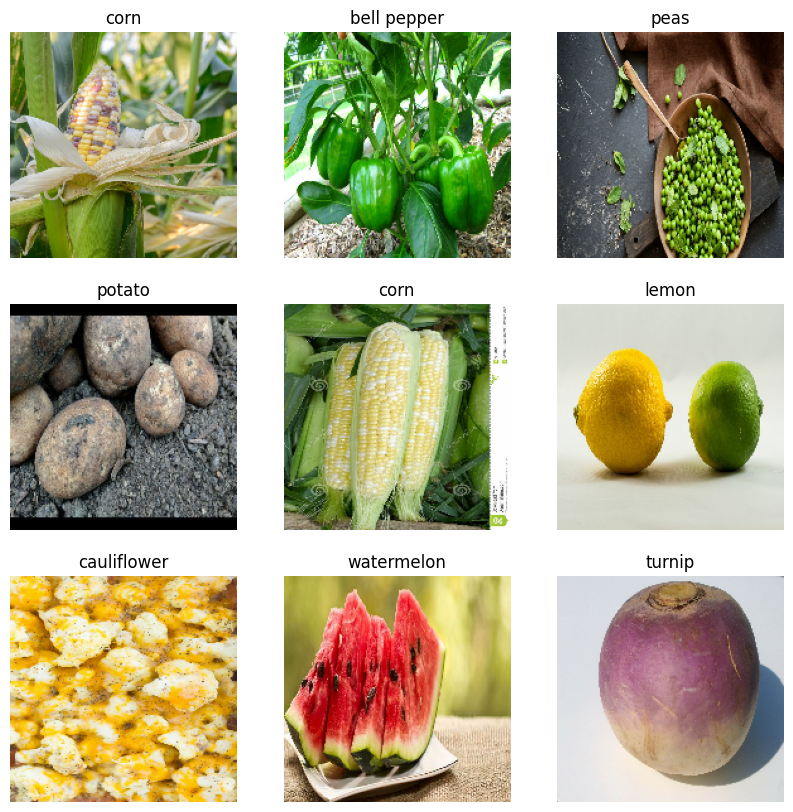

In [12]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [15]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [16]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [17]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 328ms/step - accuracy: 0.0786 - loss: 3.6710 - val_accuracy: 0.3647 - val_loss: 2.2522
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 48s 488ms/step - accuracy: 0.2925 - loss: 2.4409 - val_accuracy: 0.5214 - val_loss: 1.5655
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 480ms/step - accuracy: 0.4344 - loss: 1.9654 - val_accuracy: 0.7407 - val_loss: 0.9986
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 416ms/step - accuracy: 0.5567 - loss: 1.5376 - val_accuracy: 0.8376 - val_loss: 0.6171
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 37s 373ms/step - accuracy: 0.7162 - loss: 1.0001 - val_accuracy: 0.9145 - val_loss: 0.4259
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 295ms/step - accuracy: 0.8505 - loss: 0.5434 - val_accuracy: 0.9145 - val_loss: 0.4550
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 30s 306ms/step - accuracy: 0.9058 - loss: 0.3333 - val_accuracy: 0.9145 - val_loss: 0.4030
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 29s 300ms/step - accuracy: 0.9141 - loss: 0.2937 - val_accu

Text(0.5, 1.0, 'Loss')

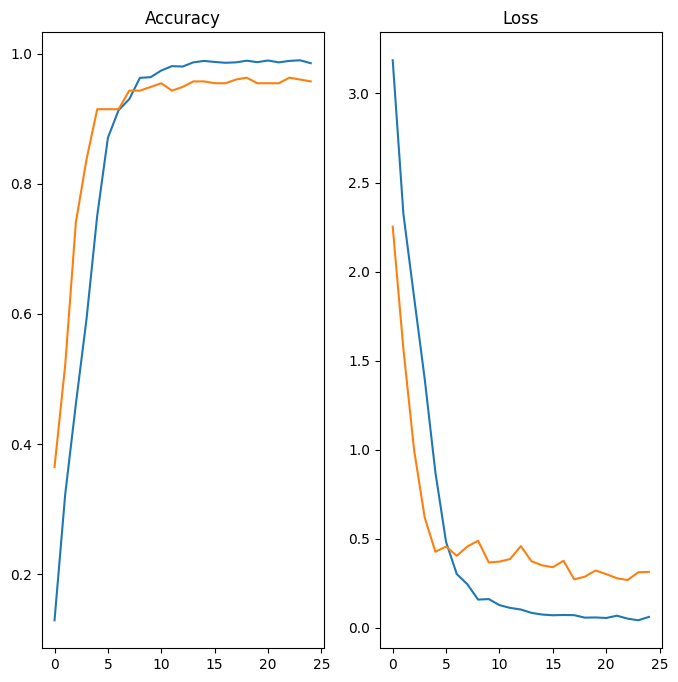

In [18]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [19]:
image = 'Apple.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [20]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


In [21]:
score = tf.nn.softmax(predict)

In [22]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is apple with accuracy of 99.76


In [23]:
model.save('Image_classify.keras')